In [5]:
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import (RandomOverSampler, SMOTE, ADASYN)
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report



%matplotlib inline
class_names = ["Normal", "Corrupt", "Delay", "Duplicate", "Loss"]

seed = 0

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, fig_size=(12,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    """
    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)
    fig, ax = plt.subplots(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [6]:
print(matplotlib.__version__)

3.1.3


./Models/Tranfer_Learning/DT/DTN/dtn_model_dtn_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score     support
0           1.0   1.000000  1.000000  1.000000  480.000000
1           2.0   1.000000  0.992248  0.996109  129.000000
2           3.0   1.000000  1.000000  1.000000   16.000000
3           4.0   1.000000  1.000000  1.000000  137.000000
4           5.0   0.995215  1.000000  0.997602  208.000000
5      accuracy   0.998969  0.998969  0.998969    0.998969
6     macro avg   0.999043  0.998450  0.998742  970.000000
7  weighted avg   0.998974  0.998969  0.998968  970.000000
./Models/Tranfer_Learning/DT/HPC/hpc_model_hpc_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score      support
0           1.0   1.000000  0.994624  0.997305   186.000000
1           2.0   0.992968  0.992968  0.992968   711.000000
2           3.0   0.952577  0.888462  0.919403   520.000000
3           4.0   0.948718  0.982301  0.965217   113.000000
4           5.0   0.975468  0.988622  0.98200

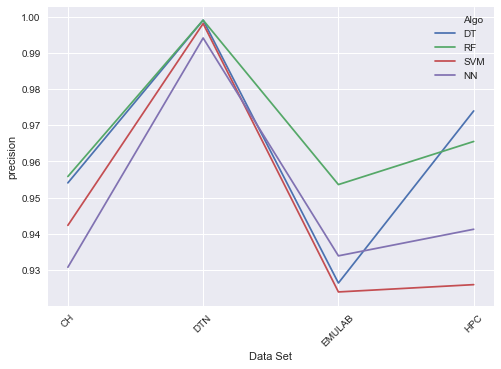

./Models/Tranfer_Learning/DT/DTN/dtn_model_dtn_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score     support
0           1.0   1.000000  1.000000  1.000000  480.000000
1           2.0   1.000000  0.992248  0.996109  129.000000
2           3.0   1.000000  1.000000  1.000000   16.000000
3           4.0   1.000000  1.000000  1.000000  137.000000
4           5.0   0.995215  1.000000  0.997602  208.000000
5      accuracy   0.998969  0.998969  0.998969    0.998969
6     macro avg   0.999043  0.998450  0.998742  970.000000
7  weighted avg   0.998974  0.998969  0.998968  970.000000
./Models/Tranfer_Learning/DT/HPC/hpc_model_hpc_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score      support
0           1.0   1.000000  0.994624  0.997305   186.000000
1           2.0   0.992968  0.992968  0.992968   711.000000
2           3.0   0.952577  0.888462  0.919403   520.000000
3           4.0   0.948718  0.982301  0.965217   113.000000
4           5.0   0.975468  0.988622  0.98200

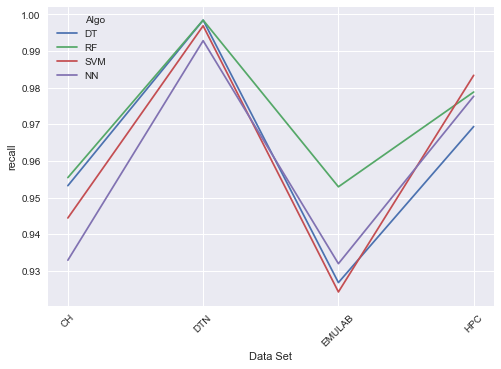

./Models/Tranfer_Learning/DT/DTN/dtn_model_dtn_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score     support
0           1.0   1.000000  1.000000  1.000000  480.000000
1           2.0   1.000000  0.992248  0.996109  129.000000
2           3.0   1.000000  1.000000  1.000000   16.000000
3           4.0   1.000000  1.000000  1.000000  137.000000
4           5.0   0.995215  1.000000  0.997602  208.000000
5      accuracy   0.998969  0.998969  0.998969    0.998969
6     macro avg   0.999043  0.998450  0.998742  970.000000
7  weighted avg   0.998974  0.998969  0.998968  970.000000
./Models/Tranfer_Learning/DT/HPC/hpc_model_hpc_data_DT_CR.csv
     Unnamed: 0  precision    recall  f1-score      support
0           1.0   1.000000  0.994624  0.997305   186.000000
1           2.0   0.992968  0.992968  0.992968   711.000000
2           3.0   0.952577  0.888462  0.919403   520.000000
3           4.0   0.948718  0.982301  0.965217   113.000000
4           5.0   0.975468  0.988622  0.98200

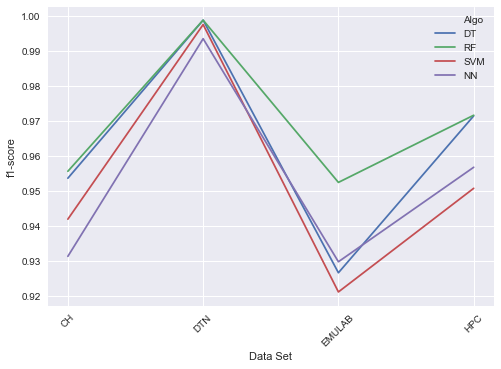

In [37]:
# Initialize the data
x = ["DTN","HPC","EMULAB","CH"]
datasets=["DTN","HPC","EMULAB","CH"]
algorithm = ["DT","RF","SVM","NN"]
metrics = ["precision","recall","f1-score"]
plt.style.use('seaborn')
y = []
array = pd.DataFrame()
for metric in metrics:
    for algo in algorithm:
        y = np.zeros(shape=(4,), dtype='float64')
        for i in range(4):
            print("./Models/Tranfer_Learning/"+algo+"/"+datasets[i]+"/"+datasets[i].lower()+"_model_"+datasets[i].lower()+"_data_"+algo+"_CR.csv")
            data = pd.read_csv("./Models/Tranfer_Learning/"+algo+"/"+datasets[i]+"/"+datasets[i].lower()+"_model_"+datasets[i].lower()+"_data_"+algo+"_CR.csv", sep='\t')
            print(data)
            y[i] = data[metric][6]
        print(y)
        data = pd.DataFrame(data={'Data Set': x, metric: y, "Algo" :algo})
        print(data)
        array = array.append(data)
    sns.set_style("darkgrid")
    grid = sns.lineplot(data = array,x='Data Set', y=metric,hue = "Algo")
    plt.setp(grid.get_xticklabels(), rotation=45)
    plt.show()
    plt.style.use('seaborn')
    figure = grid.get_figure()
    figure.savefig("./PLOT_figures/CR/"+"_"+metric+"_"+'.pdf', bbox_inches='tight')
        

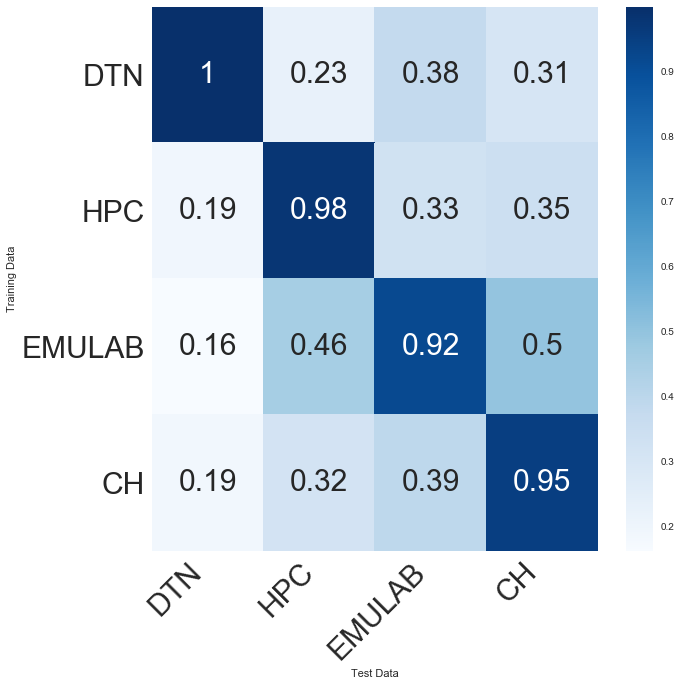

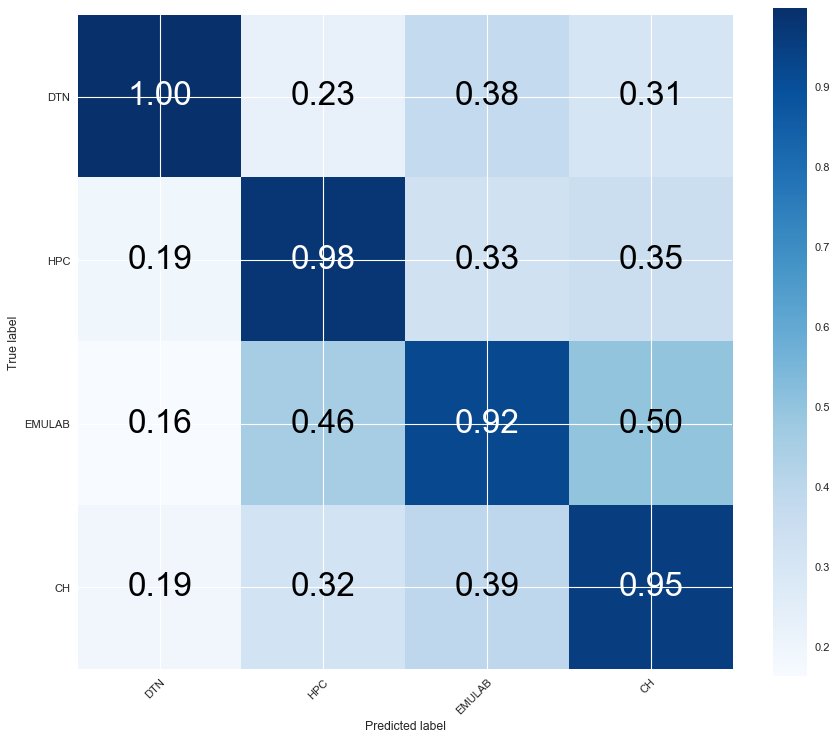

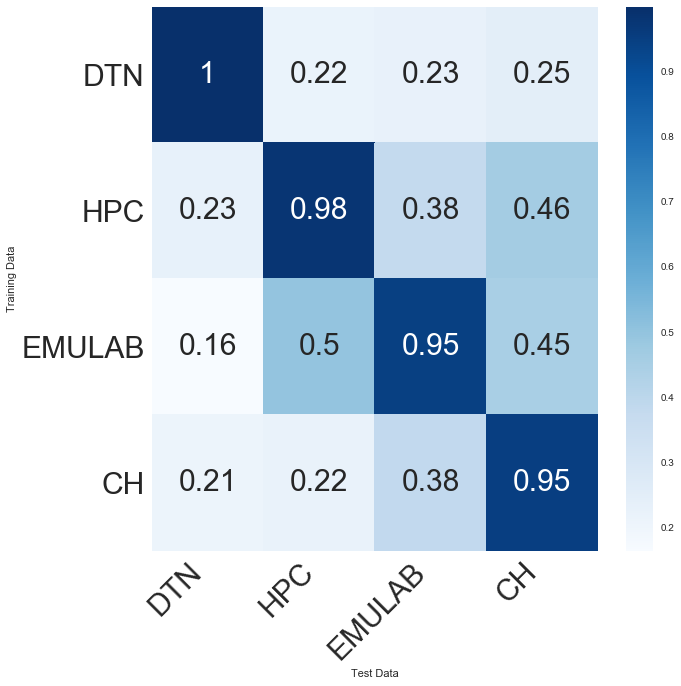

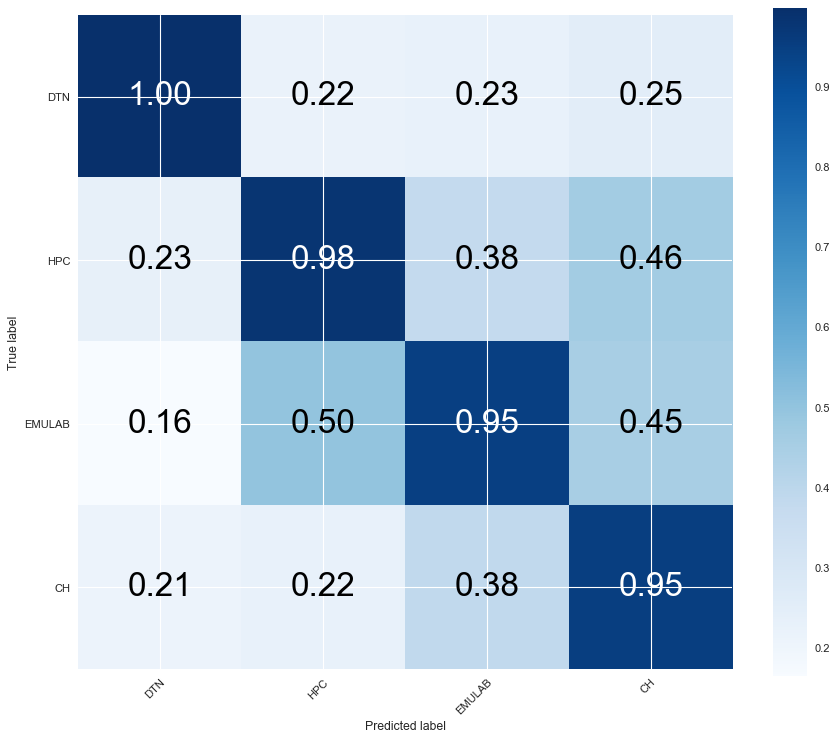

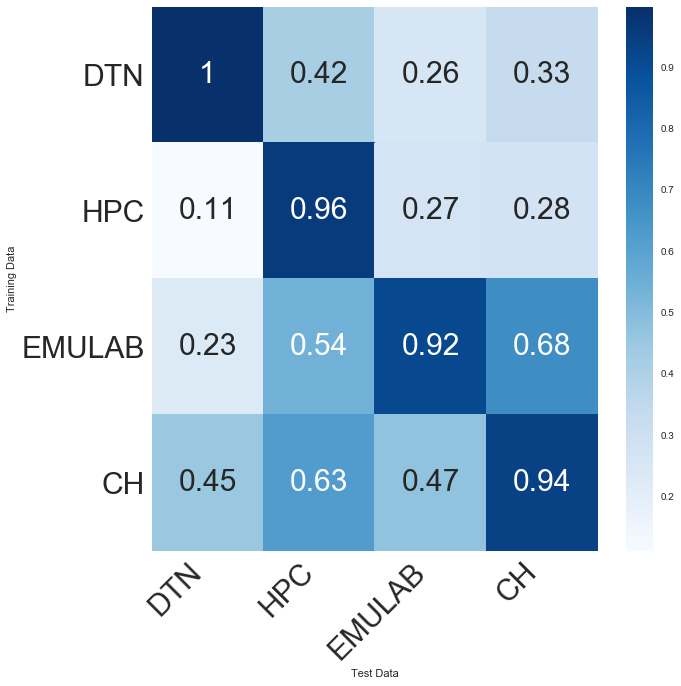

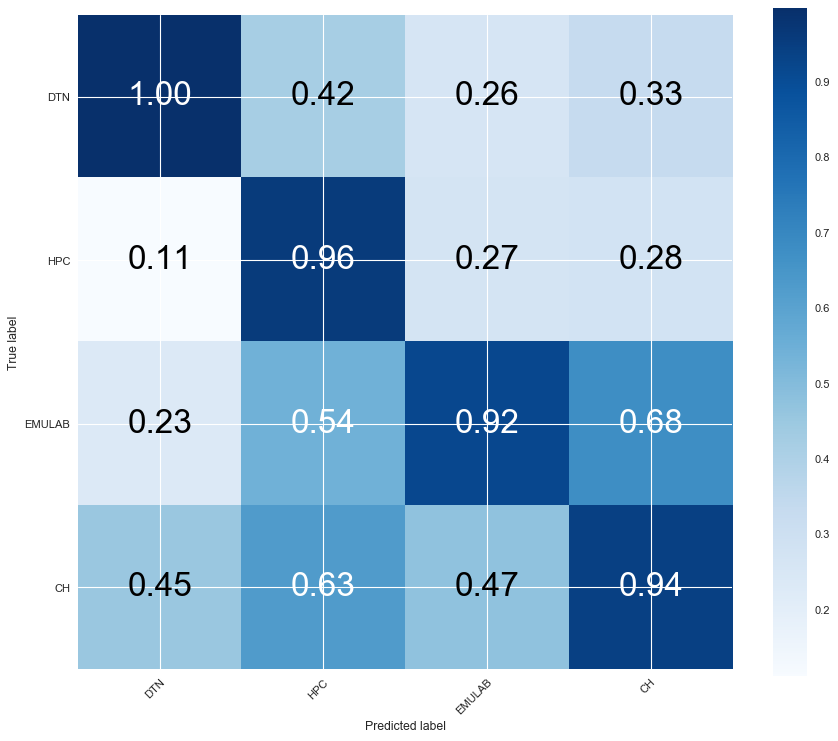

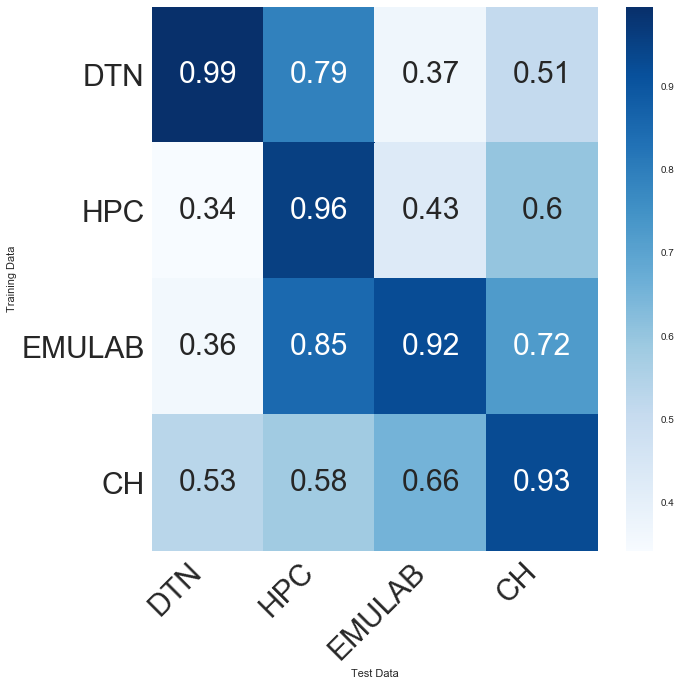

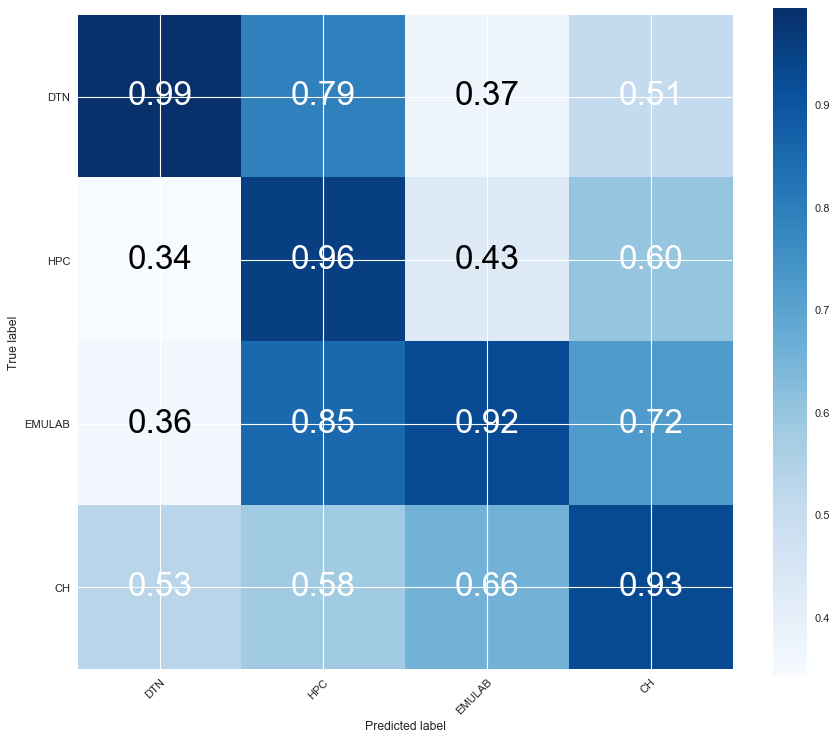

In [21]:
datasets=["DTN","HPC","EMULAB","CH"]
algorithm = ["DT","RF","SVM","NN"]
metrics = ["f1-score"]
for metric in metrics:
    for algo in algorithm:
        array = np.zeros(shape=(4,4))
        for i in range(4):
            for j in range(4):
                data = pd.read_csv("./Models/Tranfer_Learning/"+algo+"/"+datasets[i]+"/"+datasets[i].lower()+"_model_"+datasets[j].lower()+"_data_"+algo+"_CR.csv", sep='\t')
                array[i][j] = data[metric][5]
        df_cm = pd.DataFrame(array, index = datasets,
          columns = datasets)
        plt.figure(figsize = (10,10))
        heatmap = sn.heatmap(df_cm, annot=True,cmap="Blues")
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=30)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=30)
        plt.ylabel('Training Data')
        plt.xlabel('Test Data')
        figure = heatmap.get_figure()    
        plot_confusion_matrix(array, normalize=True,classes=datasets, title='')
        plt.rcParams.update({'font.size': 30})
        figure.savefig("./PLOT_figures/"+algo+'.pdf', transparent=True, bbox_inches='tight')
        plt.show()



[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
    hour  direction  hourly_avg_count
0      0          1                25
1      1          1                27
2      2          1                23
3      3          1                27
4      4          1                29
5      5          1                18
6      6          1                21
7      7          1                27
8      8          1                26
9      9          1                22
10    10          1                16
11    11          1                29
12    12          1                25
13    13          1                15
14    14          1                25
15    15          1                14
16    16          1                23
17    17          1                16
18    18          1     

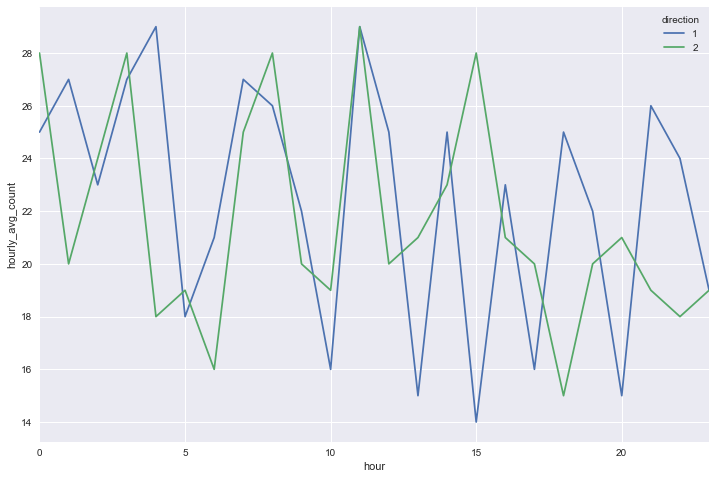

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hour, direction = np.meshgrid(np.arange(24), np.arange(1,3))
print(hour)
print(direction)
df = pd.DataFrame({"hour": hour.flatten(), "direction": direction.flatten()})
df["hourly_avg_count"] = np.random.randint(14,30, size=len(df))
print(df)

plt.figure(figsize=(12,8))
sns.tsplot(df, time='hour', unit = "direction", 
               condition='direction', value='hourly_avg_count')

plt.show()
